# Neural Network from Scratch

## Import libraries

We will be using the lower resolution MINST data set

### References
Project 6 lecture slides

In [39]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 

## Looking at the data

After we load the data, we print the shape of the data and a pixelated digit.

We also show what the features of one example looks like.

The neural net will learn to estimate which digit these pixels represent.

The shape of the digits dataset:
(1797, 64)


<Figure size 432x288 with 0 Axes>

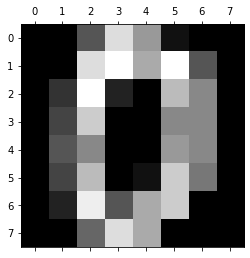

[0]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [40]:
# load all the digits (img)
digits = load_digits()

# load the data from the digit (img)
X = digits.data
y = digits.target

print("The shape of the digits dataset:") 
print(digits.data.shape)

# plot the digits
# using .gray()
plt.gray()

# and .matshow() with argument digit.images[xx]
plt.matshow(digits.images[0])

# plt.show()
plt.show()
# get the gt for this digit img

print(y[0:1])
print(X[0,:])

## 1) Scale the dataset
The training features range from 0 to 15.  To help the algorithm converge, we will scale the data to have a mean of 0 and unit variance

In [289]:
# use the stander lib to scale the data
# init the scaler 
scaler = StandardScaler()

# fit the data to the scaler 
# Looking the new features after scaling

X = scaler.fit_transform(X)
print(X)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


## 2) Creating training and test datasets
We split the data into training and test data sets. We will train the neural network with the training dataset, and evaluate our neural network with the test dataset 

In [282]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6,test_size = 0.4)

## 3) Setting up the output layer

### One hot encoding

In [43]:
def convert_y_to_vect(y):
#     Our target is an integer in the range [0,..,9], so we will have 10 output neuron's in our network.  

#     If  y=0 we want the output neurons to have the values (1,0,0,0,0,0,0,0,0,0)
#     If  y=1 we want the output neurons to have the values (0,1,0,0,0,0,0,0,0,0)
#     etc

#     Thus we need to change our target so it is the same as our hoped for output of the neural network. 

#     If y=0$we change it into the vector (1,0,0,0,0,0,0,0,0,0)
#     If y=1 we change it into the vector (0,1,0,0,0,0,0,0,0,0)
#     etc

#     The code to covert the target vector.
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
        
    return y_vect

Converting the training and test targets to vectors 

In [287]:
# convert digits to vectors using the func above
# appky this to both train and test splits

y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)

A quick check to see that our code performs as we expect 

In [288]:
print(y_train[0:4])
print(y_v_train[0:4])

[7 9 4 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## 4) Creating the neural network

### The activation function and its derivative

In [300]:
# We will use the sigmoid activation function:  f(z)={1}/{1+e^{-z}}
def f(z):
    return 1 / (1 + np.exp(-z))

# The deriviative of the sigmoid function is: $f'(z) = f(z)(1-f(z))$ 
def f_deriv(z):
    return f(z) * (1 - f(z))

### Creating and initialing W and b

In [311]:
def setup_and_init_weights(nn_structure):
    # The weights in W are different so that during back propagation the nodes on a level will have different gradients and thus have different update values.
    #creating a dictionary for wiehgts i.e. a set of key: value pairs
    W = {}
    #creating a dictionary for bias i.e. a set of key: value pairs
    b = {}
    for i in range(1, len(nn_structure)):
        # We want the weights to be small values, since the sigmoid is almost "flat" for large inputs.
        # Next is the code that assigns each weight a number uniformly drawn from $[0.0, 1.0)$.  
        # The code assumes that the number of neurons in each level is in the python list *nn_structure*.
        # .random_sample return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        W[i] = r.random_sample((nn_structure[i], nn_structure[i-1]))
        b[i] = r.random_sample((nn_structure[i],))
    # Return weight and b
    return W, b

### Initializing $\triangledown W$ and $\triangledown b$

In [320]:
def init_tri_values(nn_structure):
    # Creating dlt_W and dlt_b to have the same size as W and b,and init the dlt_W, and dlt_b to 0
    dlt_W = {}
    dlt_b = {}
    
    # use for loop to init the dlt W and dlt b
    for i in range(1, len(nn_structure)):
        # you can use np.zeros
        dlt_W[i] = np.zeros((nn_structure[i], nn_structure[i-1]))
        dlt_b[i] = np.zeros((nn_structure[i],))
    return dlt_W, dlt_b

## Feed forward
Perform a forward pass throught the network.  The function returns the values of $a$ and $z$

In [328]:
def feed_forward(x, W, b):
    # create a dictionary for holding the a values for all levels
    a = {}
    
    # create a dictionary for holding the z values for all the layers
    z = {}
    
    # for each layer
    a[1] = x
    for i in range(1, len(W)+1): #checking if i =  1 so that the dot product can be with x, to avoid error otherwise
        if i == 1:
            z[i+1] =np.dot(W[i],x) + b[i]
        else:
        # z^(l+1) = W^(l)*a^(l) + b^(l)
            z[i+1] =np.dot(W[i],a[i]) + b[i]
        
        # a^(l+1) = f(z^(l+1))
        a[i+1] = f(z[i+1])
        
    return a, z

## Compute $\delta$
compute $\delta^{(s_l)}$ in a function called "calculate_out_layer_delta",  and  computes $\delta^{(\ell)}$ for the hidden layers in the function called "calculate_hidden_delta".  


In [307]:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) *f_deriv(z_out)


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(w_l.T,delta_plus_1) * f_deriv(z_l)

## The Back Propagation Algorithm

In [348]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    # init W and b
    W, b = setup_and_init_weights(nn_structure)
   
    # init counter to 0
    count = 0
    
    # store the length of data
    N = len(X)
    
    # init a list to store the all costs
    costs = []
    
    print('Starting gradient descent for {} iterations'.format(iter_num))
    # while the counter is less than the max iterations:
    while count < iter_num:
        # print the iteration number for every 1000 iter
        if (count % 1000 == 0) :
            print("Iteration #: ", count)
        
        # init delt_W and delt_b
        dlt_W, dlt_b = init_tri_values(nn_structure)
        
        # init the cost to 0
        cost = 0
        # for each data:
        for i in range(N):
            delta={}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            y_row = y[i, :] #getting each row of X and y
            X_row = X[i, :]
            
            a, z = feed_forward(X_row, W, b)
            
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y_row, a[l], z[l])
                    cost += np.sum((y_row-a[l])**2) #formula for calculating mean squared error given by project lecture
                else:
                    if l >1: #ensures that this function only happens when the first delta entry has been filled
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                        
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                        # hit: you can use np.newaxis to increase the number of dimensions
                    dlt_W[l] += np.dot(delta[l+1][:, np.newaxis],a[l][:, np.newaxis].T)
                
                    # trib^(l) = trib^(l) + delta^(l+1)
                    dlt_b[l] += delta[l+1]
                
        # perform the gradient descent step for the weights in each layer
        for j in range (len(nn_structure) - 1, 0, -1): #finding the difference in errors and doing the back propogation
            W[j] = W[j] - (alpha*dlt_W[j]/N) 
            b[j] = b[j] - (alpha*dlt_b[j]/N)
        
        
        # complete the average cost (mean squared error) calculation
        cost = cost/N
        
        # append the cost to the cost list
        costs.append(cost)
        
        # increase the counter 
        count += 1
    return b, W, costs

In [334]:
def predict_y(W, b, X, n_layers):
    # store the length of data
    N = X.shape[0]
    
    # init for prediction array
    pred = np.zeros((N,))
    
    # for each data:
    for i in range(N):
        # feed forward
        a, z = feed_forward(X[i,:],W,b,)
        
        # predict
        pred[i] = np.argmax(a[n_layers]) #based on explanation given in project lecture
        
    return pred

## Running the neural network

Our code assumes the size of each layer in our network is held in a list.  The input layer will have 64 neurons (one for each pixel in our 8 by 8 pixelated digit).  Our hidden layer has 30 neurons (you can change this value).  The output layer has 10 neurons.

Next we create the python list to hold the number of neurons for each level and then run the neural network code with our training data.

This code will take some time...

In [349]:
nn_structure = [64, 30, 10] 

# train the NN with the nn_structure and 3000 iterations
b, W, costs = train_nn(nn_structure, X_train, y_v_train)

Starting gradient descent for 3000 iterations
Iteration #:  0
Iteration #:  1000
Iteration #:  2000


### Plotting the learning curve

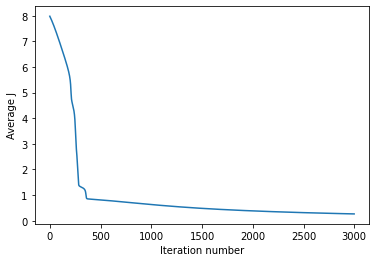

In [350]:
# plot the avg_cost_func
plt.plot(costs)

# x label: "Iteration number"
plt.xlabel('Iteration number')

# y label: "Average J"
plt.ylabel('Average J')

plt.show()

In [351]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 89.56884561891516%


## Running my own neural network

Experimenting with my own hyper-parameters by changing the number of neurons the hidden layer has

In [352]:
nn_structure = [64, 50, 10] 

# train the NN with the nn_structure and 3000 iterations
b, W, costs = train_nn(nn_structure, X_train, y_v_train)

Starting gradient descent for 3000 iterations
Iteration #:  0
Iteration #:  1000
Iteration #:  2000


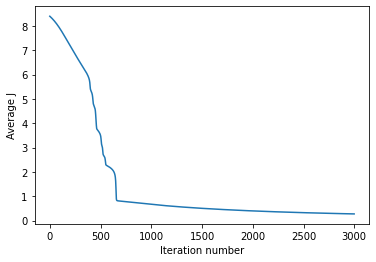

In [353]:
# plot the avg_cost_func
plt.plot(costs)

# x label: "Iteration number"
plt.xlabel('Iteration number')

# y label: "Average J"
plt.ylabel('Average J')

plt.show()

In [354]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 89.4297635605007%


### Discussion

When comparing the neurl networks of different neuron numbers, those with a greater number of neurons took more iterations to adjust their weights to account for the errors betwen the predictions and the actual values. The accuracy is roughly the same with a minute difference between the two, hence the number of neurons does not affect the accuracy but only the time take for the sample to be fully trained witht the data so that accurate predictons can be made.